# 10.2	Lebensdauer von Generatoren

a) Es handelt sich um eine zweidimensionale Varianzanalyse. Jeder Versuchspunkt wurde vier-mal gemessen. Es ergeben sich damit vier unterschiedliche Varianzen:


•	Varianz durch Änderung der Umgebungstemperatur

•	Varianz durch Änderung des Materials

•	Wechselwirkung zwischen Temperatur und Material

•	Varianz innerhalb der Gruppen


In der ANOVA-Tabelle werden die drei ersten Varianzgründe mit der Varianz innerhalb der Gruppe zueinander in Verhältnis gesetzt. Es ergeben sich F-verteilte Zufallsvariable, die statis-tisch bewertet werden können.


In [5]:
""" Bibliotheken importieren"""
import pandas as pd
from scipy.io import  loadmat
import matplotlib.pyplot as plt
import numpy as np
import ANOVA2

%matplotlib inline  

'''Daten laden'''
data1=loadmat('LebensdauerGeneratoren')['Data1']
data2=loadmat('LebensdauerGeneratoren')['Data2']

''' um ptl_anova2_Funktion to verwenden soll die Anzahl der Gruppen (3 Materials) definiert werden'''
Nr_groups=3

''' und neue Spalte für die Gruppen zu dem Datensatz hinzugefügt werden'''
data1=np.c_[[[int(i/(data1.shape[0]/Nr_groups))] for i in range (data1.shape[0])], data1]


''' Jetzt der Datensatz ist bereit um ptl_anova2 von ANOVA2_Datei Aufzurufen'''

df1=pd.DataFrame(data=data1, columns=['Material', 'C10','C18'])

ANOVA2.ptl_anova2(df1)


  bg: 	 SS = 34527.333, 	 df =   5
Rows: 	 SS =  2256.583, 	 df =   2, 	 ms =  1128.292, 	 F =     2.480, 	 p =   0.1119
Cols: 	 SS = 31682.667, 	 df =   1, 	 ms = 31682.667, 	 F =    69.632, 	 p =   0.0000
 Int: 	 SS =   588.083, 	 df =   2, 	 ms =   294.042, 	 F =     0.646, 	 p =   0.5357
  wg: 	 SS =  8190.000, 	 df =  18, 	 ms =   455.000
TOTL: 	 SS = 42717.333, 	 df =  23


Die ANOVA-Tabelle zeigt, dass nur die unterschiedlichen Säulen signifikant voneinander ab-weichen. Die Säulen entsprechen den unterschiedlichen Umgebungstemperaturen. Sowohl das Material als auch die Wechselwirkung zwischen Umgebungstemperatur und Material haben kei-nen signifikanten Einfluss auf das Ergebnis.

b) Zur Plausibilisierung werden wieder Box-Plots eingesetzt. Bei den unterschiedlichen Umgebungstemperauren überlappen sich die Boxes nicht, die Einflussgröße ist auch nach der ANOVA-Tabelle signifikant. 

(25, 200)

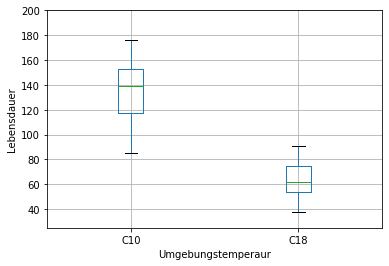

In [2]:
df1.boxplot(column=['C10','C18'])
plt.xlabel('Umgebungstemperaur')
plt.ylabel('Lebensdauer')
plt.ylim(top=200, bottom=25)

###### Der folgende Box-Plot zeigt, dass sich das Material nicht signifikant auf die Lebensdauer auswirkt, die einzelnen Boxes überlappen stark.

(10, 200)

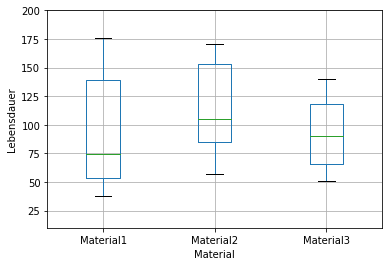

In [3]:
df2=pd.DataFrame(data2.T, columns=['Material1', 'Material2','Material3'])
df2.boxplot()
plt.xlabel('Material')
plt.ylabel('Lebensdauer')
plt.ylim(top=200, bottom=10)

Die Wechselwirkung kann mithilfe von Box-Plots nicht bewertet. Stattdessen wird ein Wechselwirkungsdiagramm erstellt, bei dem die Ausgangsgröße als Funktion einer Eingangsgröße darge-stellt wird. Für jede Eingangsstufe der zweiten Größe werden zusätzliche Kurven eingezeichnet.






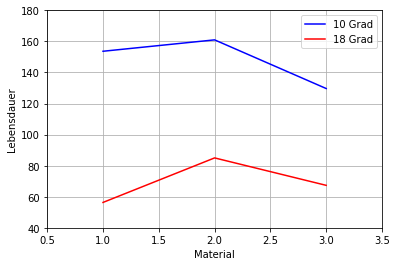

In [4]:
plt.plot([1,2,3],np.mean(data2[:,0:3],axis=1),'b')
plt.plot([1,2,3],np.mean(data2[:,4:7],axis=1),'r')
plt.grid(True)
plt.xlabel('Material')
plt.ylabel('Lebensdauer')
plt.ylim(top=180, bottom=40)
plt.xlim(right=3.5, left=0.5)
plt.legend(['10 Grad', '18 Grad'])


###### Der weitgehend parallele Verlauf der Kurven zeigt, dass die Wechselwirkung nicht signifikant ist.